## Module 2

### Treatment, exploration and Data Visualization

Continuing work in the same dataset of the Module 1 of Alura Bootcamp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [11]:
datap = pd.read_csv('https://github.com/AndreisSirlene/Bootcamp_datascience/blob/main/Module%201/CostingProceduresPerPlaceHospitalization.csv',
                    encoding='ISO-8859-1', skiprows =3, sep=" ; ", skipfooter=12, thousands='.')
datap.head(3)

<ipython-input-11-ba2d0f2aa6f5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  datap = pd.read_csv('https://github.com/AndreisSirlene/Bootcamp_datascience/blob/main/Module%201/CostingProceduresPerPlaceHospitalization.csv',


<!DOCTYPE html>
0  <html lang="en" data-color-mode="auto" data-li...
1                                             <head>
2                             <meta charset="utf-8">

In [10]:
usable_columns = datap.mean().index.tolist()
usable_columns.insert(0, "Unidade da Federação")
usable_columns
cleandata = datap[usable_columns]
cleandata.head()

KeyError: "None of [Index(['Unidade da Federação'], dtype='object')] are in the [columns]"

Give a new atribution to the index, in this case become the 'Unidade da Federacao'.

In [ ]:
cleandata = cleandata.set_index("Unidade da Federação")
cleandata.head()

In [ ]:
high_exp = cleandata.sort_values('Total', ascending=False)
high_exp = high_exp.drop('Total', axis=1)
high_exp.head()

Slice the dataframe to eliminate the first months where the acumulate data was input manually and created a discrepance on the data. So for further analyses I will consider just from 2008/Fev.

In [ ]:
accurate = high_exp.columns[6:]
high_exp = high_exp[accurate]

In [ ]:
high_exp.head()

### Verify the expenses of the most recent monthly

Here the most recently month is considered July 2020, as the data was colected until August 2020, but we ignore August as the data may not have been entirelly update in all states.

In [ ]:
more_current_month = high_exp.columns[-1]

last_expenses = high_exp[more_current_month]
last_expenses.head()

In [ ]:
last_expenses = last_expenses.sort_values(ascending=False)
ax = last_expenses.plot(kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Last month of expenses data by Federative Unit')
plt.grid(color='grey', linestyle='-', linewidth=0.5);

## Module 2 -  effectivelly start from here

In [ ]:
last_expenses.head()

To find out the proportion of this expenses compare with the total expende in all the country.

First sum up all the expenses

In [ ]:
last_expenses.sum()

To get the proportion of expenses, divide the total expenses with the 5 more expenses

In [ ]:
proportional_exp = last_expenses / last_expenses.sum()
proportional_exp.head(5)

In [ ]:
proportional_exp.plot(kind='bar', figsize=(12,8))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=50)
plt.title('Proportion expenses by state of Federative Unit');

**It is important not relativizar the data, as there are different costs in diferent seasons for diferent regions, as Brazil is a tropical country, we will encounter regions like North and Nordest that does not have winter season, so become not affected for flu periods which can demand intensive programs of vacination and control. Other factor to be consider is the population per state and der demographic distribution.**

## Tables of population estimates for the Brazilian municipalities and Federation Units on July 1nd , 2020:

In [ ]:
#pip install xlrd

In [12]:
ibge_est_pop = pd.read_excel('https://github.com/AndreisSirlene/Bootcamp_datascience/raw/main/estimativa_dou_2020.xls',
                     skipfooter=7)
ibge_est_pop.head(10)

HTTPError: HTTP Error 404: Not Found

### We can even extract from Wikipedia by just copy and paste the table
Font:https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

**Just be aware that copy and past is multline, so is need to open and close 3 times quotes """"""**

In [13]:
population_est = """Posição	Unidade federativa	População	% da pop. total	País comparável (habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
Por região
Posição	Região	População	% da pop. total	País comparável (habitantes)
1	Região Sudeste	89 012 240	42,04%	 República Democrática do Congo (86 790 567)
2	Região Nordeste	57 374 243	27,09%	 África do Sul (58 775 022)
3	Região Sul	30 192 315	14,26%	 Nepal (29 609 623)
4	Região Norte	18 672 591	8,82%	 Cazaquistão (18 574 680)
5	Região Centro-Oeste	16 504 303	7,79%	 Senegal (16 209 125)"""

Ready a table extract directly from the internet to cross information later.

This table is separeted by Tab, so we can read the table as follow:

In [19]:
from io import StringIO  
population_est_io = StringIO(population_est)

population = pd.read_csv(population_est_io, sep="\t", skipfooter=6)
display(population.head())

<ipython-input-19-e3061fc24ae9>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  population = pd.read_csv(population_est_io, sep="\t", skipfooter=6)


Posição Unidade federativa   População % da pop. total  \
0       1          São Paulo  46 289 333           21,9%   
1       2       Minas Gerais  21 292 666           10,1%   
2       3     Rio de Janeiro  17 366 189            8,2%   
3       4        Bahia Bahia  14 930 634            7,1%   
4       5             Paraná  11 516 840            5,4%   

             País comparável (habitantes)  
0  Flag of Spain.svg Espanha (46 439 864)  
1                  Sri Lanka (20 675 000)  
2              Países Baixos (16 922 900)  
3                      Chade (14 037 000)  
4                    Bolívia (11 410 651)

In [20]:
population['População'].unique()

array(['46 289 333', '21 292 666', '17 366 189', '14 930 634',
       '11 516 840', '11 422 973', '9 616 621', '9 187 103', '8 690 745',
       '7 252 502', '7 114 598', '7 113 540', '4 207 714', '4 064 052',
       '4 039 277', '3 534 165', '3 526 220', '3 351 543', '3 281 480',
       '3 055 149', '2 809 394', '2 318 822', '1 796 460', '1 590 248',
       '894 470', '861 773', '631 181', None], dtype=object)

In [21]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Posição                       28 non-null     object
 1   Unidade federativa            27 non-null     object
 2   População                     27 non-null     object
 3   % da pop. total               27 non-null     object
 4   País comparável (habitantes)  27 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


In [22]:
population = population.dropna()
population["population"] = population["População"].str.replace(" ", "").astype(int)
population["UF"] = population["Unidade federativa"]
population = population[["population", "UF"]].set_index("UF")

display(population.head())
display(population.info())

population
UF                         
 São Paulo         46289333
 Minas Gerais      21292666
 Rio de Janeiro    17366189
Bahia Bahia        14930634
 Paraná            11516840

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   population  27 non-null     int32
dtypes: int32(1)
memory usage: 324.0+ bytes


None

In [23]:
population.index.str[:3]

Index([' Sã', ' Mi', ' Ri', 'Bah', ' Pa', ' Ri', ' Pe', ' Ce', 'Par', ' Sa',
       ' Ma', ' Go', ' Am', ' Es', ' Pa', ' Ri', ' Ma', ' Al', ' Pi', ' Di',
       ' Ma', ' Se', ' Ro', ' To', ' Ac', ' Am', ' Ro'],
      dtype='object', name='UF')

In [24]:
last_expenses.index = last_expenses.index.str[3:]
last_expenses.head()    

NameError: name 'last_expenses' is not defined

In [25]:
population.index = population.index.str.strip()
population.head()

population
UF                        
São Paulo         46289333
Minas Gerais      21292666
Rio de Janeiro    17366189
Bahia Bahia       14930634
Paraná            11516840

When print the join tables we figurate some errors like duplicate name of UF appears( eg. Bahia Bahia)

In [26]:
population.join(last_expenses).head()

NameError: name 'last_expenses' is not defined

The index is showing that there is space before the UF, so in the next line we remove it.

In [27]:
population.index[0] 

'São Paulo'

In [28]:
population.index[0].strip()

'São Paulo'

### Remove the duplicate UF names in the index

In [29]:
for estado in last_expenses.index:
    population.index = population.index.str.replace(f'{estado} {estado}', estado)
population.index

NameError: name 'last_expenses' is not defined

In [30]:
population.join(last_expenses)

NameError: name 'last_expenses' is not defined

### Challenge 1: read the file direct from the wikipedia source (html)

In [ ]:
pip install lxml

In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
dfs = pd.read_html(url)

In [ ]:
dfs = pd.read_html(url, header=0, index_col=0)
#pd.options.display.float_format = '{:.2f}'.format
dfs

### Module 2 - Class 4

In [ ]:
expenses_with_est_population2020 = population.join(last_expenses)
expenses_with_est_population2020.head()

The graphic below does not make sense, as we have 2 different types of values, one is population and other is related to money value.

In [ ]:
expenses_with_est_population2020.plot(figsize=(14,10))

In [ ]:
expenses_with_est_population2020["expenses"] = expenses_with_est_population2020["2020/Jul"] 
expenses_with_est_population2020[["expenses", "population"]].plot()
plt.xticks(rotation=45)
expenses_with_est_population2020.head()

In [ ]:
expenses_with_est_population2020.info()

In [ ]:
expenses_with_est_population2020["expenses_per_hab"] = expenses_with_est_population2020["expenses"] / expenses_with_est_population2020["population"] 
expenses_with_est_population2020.head()

Decide not order by value, the graphic show us the states that more expend in total without scalle.

In [ ]:
ax =expenses_with_est_population2020["expenses_per_hab"].plot(kind='bar', figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Expenses v population July 2020 by Federative Unit');

## Challenge 3: order by expenses per habitants

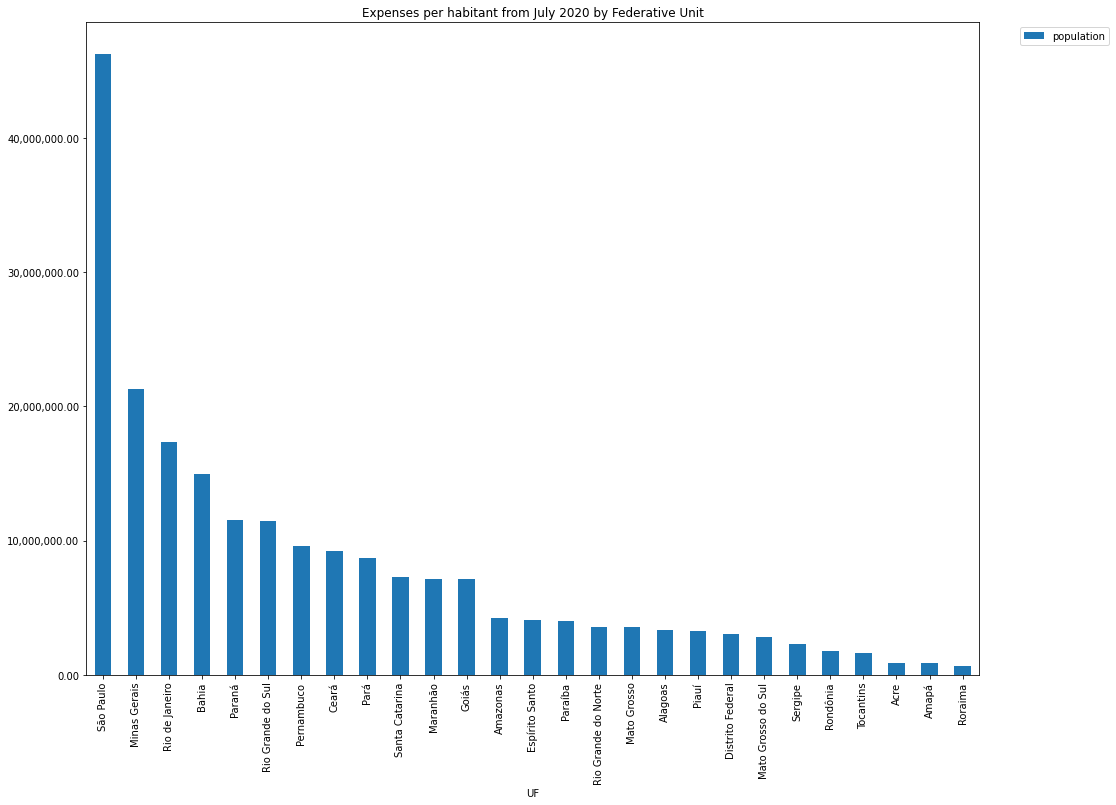

In [36]:
ax = expenses_with_est_population2020["population"].plot(kind='bar', figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Expenses per habitant from July 2020 by Federative Unit');

### Plot graphics with Seaborn library

In [37]:
import seaborn as sns

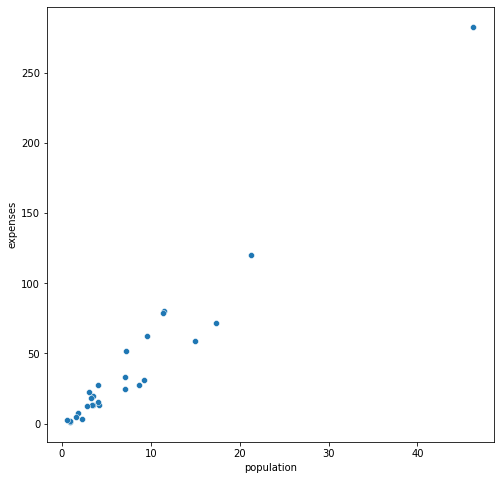

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=expenses_with_est_population2020 /1000000, x='population', y='expenses');


### Expenses per habitant

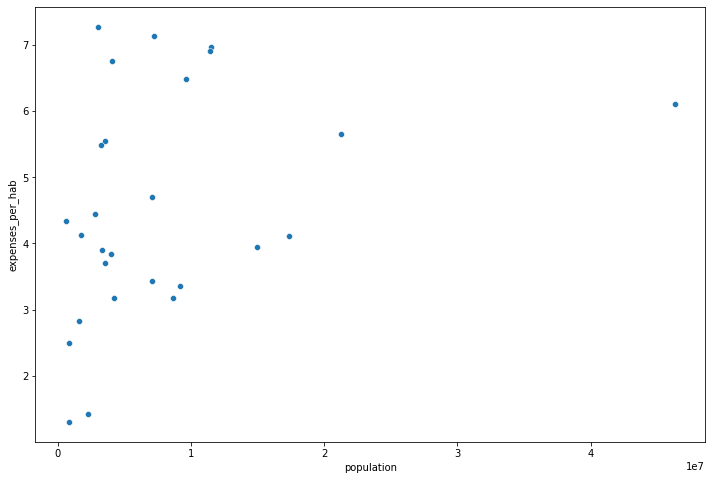

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=expenses_with_est_population2020, x='population', y='expenses_per_hab');

### Challenge 4: Plot the same graphic for the previous year, and after plot both together and differentiate by color

#### Will go back one year and see what are the most expenses 
## July 2019

In [40]:
year_ago = high_exp.columns[-13]

most_expenses = high_exp[year_ago]
most_expenses.head()


Unidade da Federação
35 São Paulo            3.066340e+08
31 Minas Gerais         1.667357e+08
41 Paraná               1.346213e+08
43 Rio Grande do Sul    1.030282e+08
33 Rio de Janeiro       8.798449e+07
Name: 2019/Jul, dtype: float64

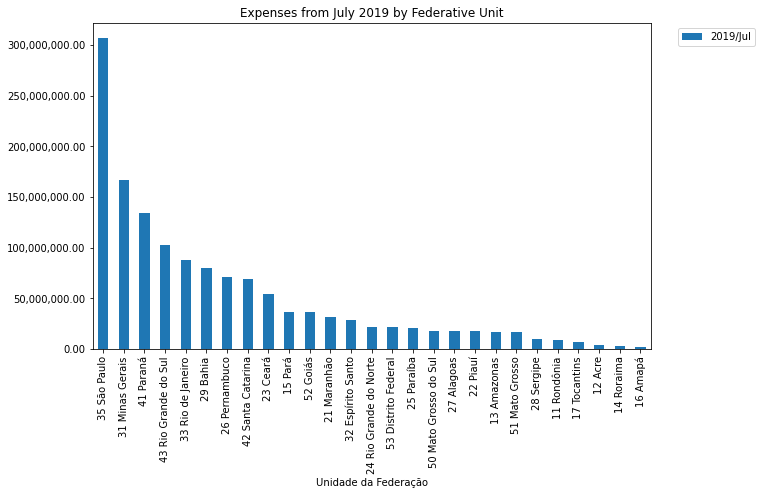

In [41]:
most_expenses = most_expenses.sort_values(ascending=False)
ax = most_expenses.plot(kind='bar', figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Expenses from July 2019 by Federative Unit');

In [42]:
most_expenses.sum()

1391906095.24

In [43]:
proportional_exp = most_expenses / most_expenses.sum()
proportional_exp.head(5)

Unidade da Federação
35 São Paulo            0.220298
31 Minas Gerais         0.119789
41 Paraná               0.096717
43 Rio Grande do Sul    0.074019
33 Rio de Janeiro       0.063212
Name: 2019/Jul, dtype: float64

Load and read a different file related to the year 2019 from the IBGE website

In [44]:
ibge_pop_2019 = pd.read_excel('POP2019_20201006 .xls')
ibge_pop_2019.head(5)  

BRASIL E UNIDADES DA FEDERAÇÃO  Unnamed: 1  POPULAÇÃO ESTIMADA
0                       Rondônia         NaN             1777225
1                           Acre         NaN              881935
2                       Amazonas         NaN             4144597
3                        Roraima         NaN              605761
4                           Pará         NaN             8602865

In [45]:
del ibge_pop_2019 ['Unnamed: 1']
ibge_pop_2019.head(27)

BRASIL E UNIDADES DA FEDERAÇÃO  POPULAÇÃO ESTIMADA
0                        Rondônia             1777225
1                            Acre              881935
2                        Amazonas             4144597
3                         Roraima              605761
4                            Pará             8602865
5                           Amapá              845731
6                       Tocantins             1572866
7                        Maranhão             7075181
8                           Piauí             3273227
9                           Ceará             9132078
10            Rio Grande do Norte             3506853
11                        Paraíba             4018127
12                     Pernambuco             9557071
13                        Alagoas             3337357
14                        Sergipe             2298696
15                          Bahia            14873064
16                   Minas Gerais            21168791
17                 Espírito Santo             4018650
18                 Rio de Janeiro            17264943
19                      São Paulo            45919049
20                         Paraná            11433957
21                 Santa Catarina             7164788
22              Rio Grande do Sul            11377239
23             Mato Grosso do Sul             2778986
24                    Mato Grosso             3484466
25                          Goiás             7018354
26               Distrito Federal             3015268

In [46]:
ibge_pop_2019["population_2019"] = ibge_pop_2019["POPULAÇÃO ESTIMADA"]
ibge_pop_2019["UF"] = ibge_pop_2019["BRASIL E UNIDADES DA FEDERAÇÃO"]
ibge_pop_2019 = ibge_pop_2019[["population_2019", "UF"]].set_index("UF")
ibge_pop_2019

population_2019
UF                                  
Rondônia                     1777225
Acre                          881935
Amazonas                     4144597
Roraima                       605761
Pará                         8602865
Amapá                         845731
Tocantins                    1572866
Maranhão                     7075181
Piauí                        3273227
Ceará                        9132078
Rio Grande do Norte          3506853
Paraíba                      4018127
Pernambuco                   9557071
Alagoas                      3337357
Sergipe                      2298696
Bahia                       14873064
Minas Gerais                21168791
Espírito Santo               4018650
Rio de Janeiro              17264943
São Paulo                   45919049
Paraná                      11433957
Santa Catarina               7164788
Rio Grande do Sul           11377239
Mato Grosso do Sul           2778986
Mato Grosso                  3484466
Goiás                        7018354
Distrito Federal             3015268

In [47]:
ibge_pop_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   population_2019  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


In [48]:
ibge_pop_2019.index.str[:3]

Index(['Ron', 'Acr', 'Ama', 'Ror', 'Par', 'Ama', 'Toc', 'Mar', 'Pia', 'Cea',
       'Rio', 'Par', 'Per', 'Ala', 'Ser', 'Bah', 'Min', 'Esp', 'Rio', 'São',
       'Par', 'San', 'Rio', 'Mat', 'Mat', 'Goi', 'Dis'],
      dtype='object', name='UF')

In [49]:
most_expenses.index = most_expenses.index.str[3:]
most_expenses.head()

Unidade da Federação
São Paulo            3.066340e+08
Minas Gerais         1.667357e+08
Paraná               1.346213e+08
Rio Grande do Sul    1.030282e+08
Rio de Janeiro       8.798449e+07
Name: 2019/Jul, dtype: float64

In [50]:
ibge_pop_2019.index = ibge_pop_2019.index.str.strip()
ibge_pop_2019.head()

population_2019
UF                       
Rondônia          1777225
Acre               881935
Amazonas          4144597
Roraima            605761
Pará              8602865

In [51]:
expenses_with_est_population2019 = ibge_pop_2019.join(most_expenses)
expenses_with_est_population2019

population_2019      2019/Jul
UF                                                
Rondônia                     1777225  8.919191e+06
Acre                          881935  3.567539e+06
Amazonas                     4144597  1.664222e+07
Roraima                       605761  2.865778e+06
Pará                         8602865  3.671393e+07
Amapá                         845731  2.445875e+06
Tocantins                    1572866  7.117047e+06
Maranhão                     7075181  3.126977e+07
Piauí                        3273227  1.750553e+07
Ceará                        9132078  5.434002e+07
Rio Grande do Norte          3506853  2.213709e+07
Paraíba                      4018127  2.045099e+07
Pernambuco                   9557071  7.131444e+07
Alagoas                      3337357  1.801028e+07
Sergipe                      2298696  1.014206e+07
Bahia                       14873064  7.956722e+07
Minas Gerais                21168791  1.667357e+08
Espírito Santo               4018650  2.855051e+07
Rio de Janeiro              17264943  8.798449e+07
São Paulo                   45919049  3.066340e+08
Paraná                      11433957  1.346213e+08
Santa Catarina               7164788  6.875967e+07
Rio Grande do Sul           11377239  1.030282e+08
Mato Grosso do Sul           2778986  1.812695e+07
Mato Grosso                  3484466  1.646780e+07
Goiás                        7018354  3.647362e+07
Distrito Federal             3015268  2.151493e+07

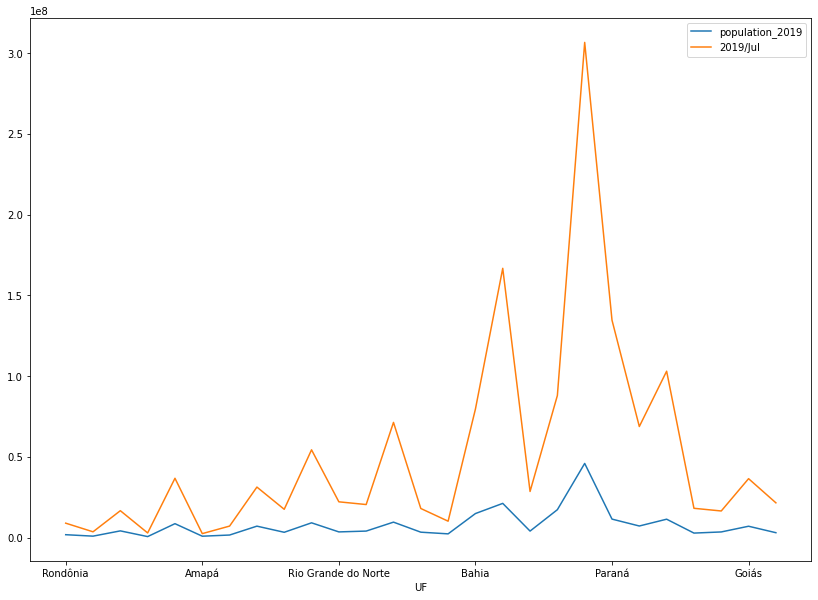

In [52]:
expenses_with_est_population2019.plot(figsize=(14,10));

population_2019      2019/Jul       expense
UF                                                              
Rondônia                     1777225  8.919191e+06  8.919191e+06
Acre                          881935  3.567539e+06  3.567539e+06
Amazonas                     4144597  1.664222e+07  1.664222e+07
Roraima                       605761  2.865778e+06  2.865778e+06
Pará                         8602865  3.671393e+07  3.671393e+07
Amapá                         845731  2.445875e+06  2.445875e+06
Tocantins                    1572866  7.117047e+06  7.117047e+06
Maranhão                     7075181  3.126977e+07  3.126977e+07
Piauí                        3273227  1.750553e+07  1.750553e+07
Ceará                        9132078  5.434002e+07  5.434002e+07
Rio Grande do Norte          3506853  2.213709e+07  2.213709e+07
Paraíba                      4018127  2.045099e+07  2.045099e+07
Pernambuco                   9557071  7.131444e+07  7.131444e+07
Alagoas                      3337357  1.801028e+07  1.801028e+07
Sergipe                      2298696  1.014206e+07  1.014206e+07
Bahia                       14873064  7.956722e+07  7.956722e+07
Minas Gerais                21168791  1.667357e+08  1.667357e+08
Espírito Santo               4018650  2.855051e+07  2.855051e+07
Rio de Janeiro              17264943  8.798449e+07  8.798449e+07
São Paulo                   45919049  3.066340e+08  3.066340e+08
Paraná                      11433957  1.346213e+08  1.346213e+08
Santa Catarina               7164788  6.875967e+07  6.875967e+07
Rio Grande do Sul           11377239  1.030282e+08  1.030282e+08
Mato Grosso do Sul           2778986  1.812695e+07  1.812695e+07
Mato Grosso                  3484466  1.646780e+07  1.646780e+07
Goiás                        7018354  3.647362e+07  3.647362e+07
Distrito Federal             3015268  2.151493e+07  2.151493e+07

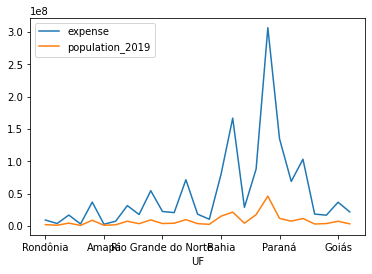

In [53]:
expenses_with_est_population2019["expense"] = expenses_with_est_population2019["2019/Jul"] 
expenses_with_est_population2019[["expense", "population_2019"]].plot()
expenses_with_est_population2019

In [54]:
expenses_with_est_population2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population_2019  27 non-null     int64  
 1   2019/Jul         27 non-null     float64
 2   expense          27 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.1+ KB


In [55]:
expenses_with_est_population2019["expense_per_hab"] = expenses_with_est_population2019["expense"] / expenses_with_est_population2019["population_2019"] 
expenses_with_est_population2019.head()

population_2019     2019/Jul      expense  expense_per_hab
UF                                                                  
Rondônia          1777225   8919190.86   8919190.86         5.018605
Acre               881935   3567538.64   3567538.64         4.045127
Amazonas          4144597  16642220.71  16642220.71         4.015401
Roraima            605761   2865777.71   2865777.71         4.730872
Pará              8602865  36713929.36  36713929.36         4.267640

Both graphics below are related and express the same Expenses v population from July 2019 by Federative Unit in Brazil.

The first one was a simple plot style, while the second one used plotly express and is more interactivo to understand and visualize, also more dinamic.

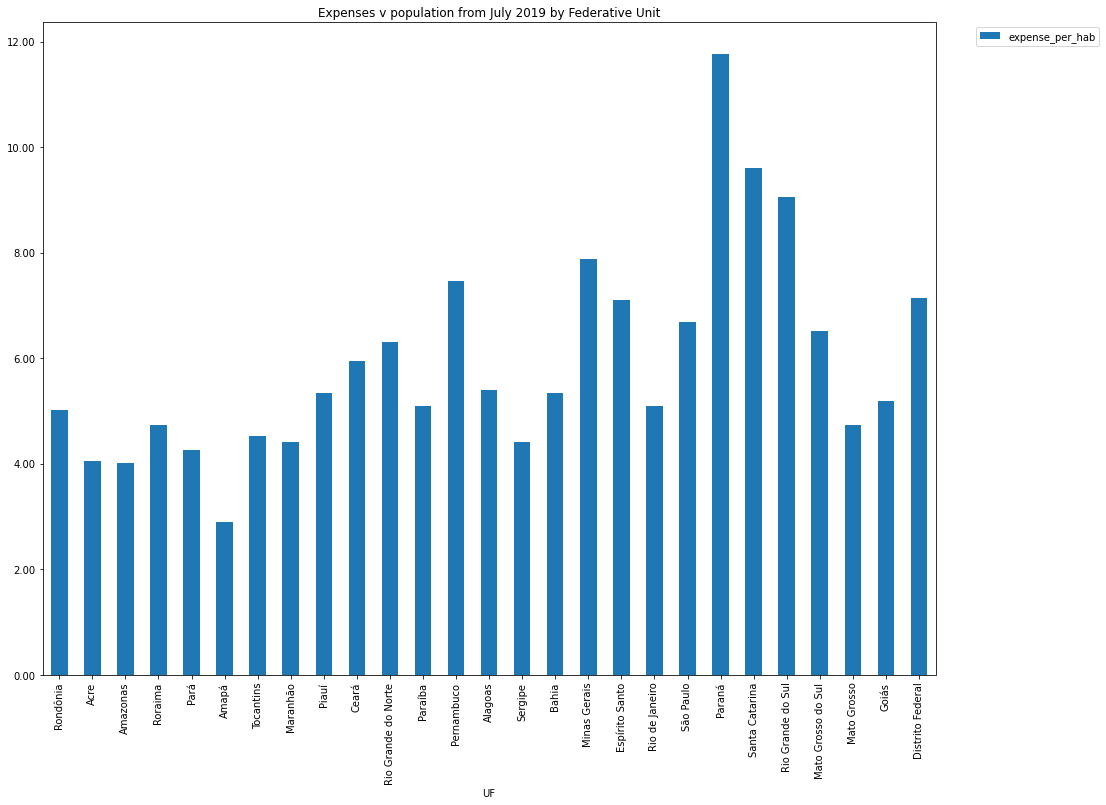

In [56]:
ax = expenses_with_est_population2019["expense_per_hab"].plot(kind='bar', figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Expenses v population from July 2019 by Federative Unit');

In [57]:
import plotly.express as px
fig2 = px.bar(x= most_expenses.index,
             y= most_expenses, labels= {'x':'Federative Unit', 'y':'Expenses'})
fig2.show()

Plotly Express allows to save in html formatand open as web page and keep the interactive.

In [58]:
fig2.write_html('image.html')

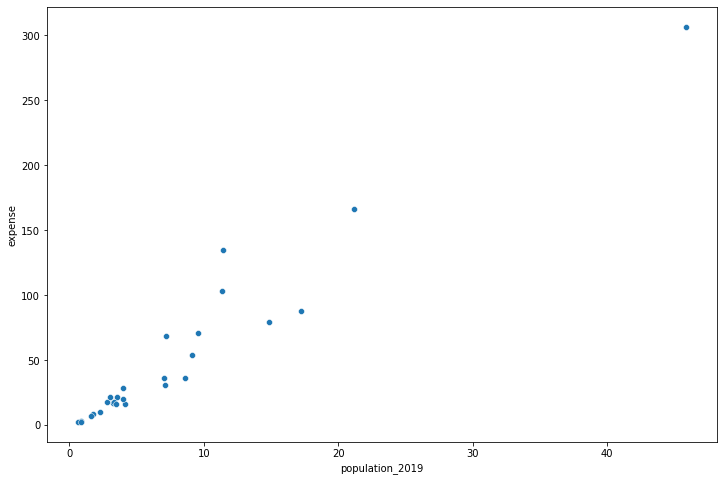

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=expenses_with_est_population2019 / 1000000, x='population_2019', y='expense');

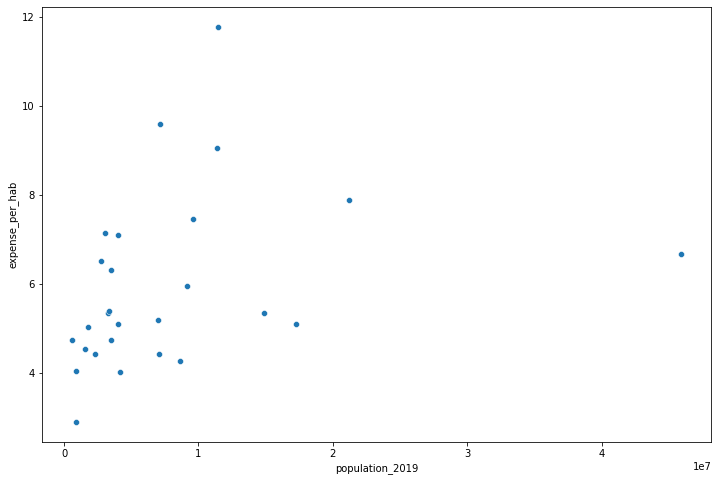

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=expenses_with_est_population2019, x='population_2019', y='expense_per_hab');

### Plot the expenses for 2020/July and 2019/July

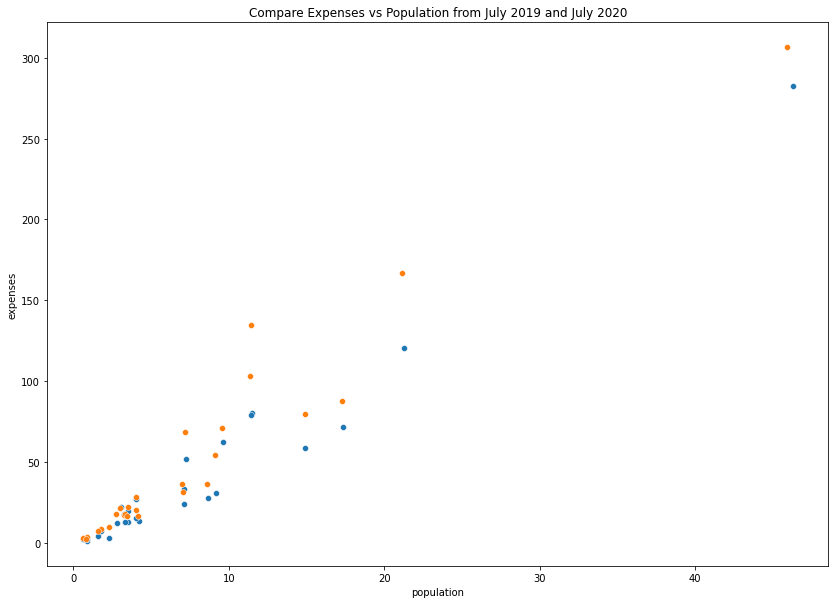

In [61]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=expenses_with_est_population2020 /1000000, x='population', y='expenses')
sns.scatterplot(data=expenses_with_est_population2019 / 1000000, x='population_2019', y='expense')
plt.title('Compare Expenses vs Population from July 2019 and July 2020');

### Formatting ticks and scale - Class 3

In [62]:
high_exp.index = high_exp.index.str[3:]
high_exp.head()

2008/Fev      2008/Mar      2008/Abr      2008/Mai  \
Unidade da Federação                                                           
São Paulo             1.728349e+08  1.704818e+08  1.702783e+08  1.724022e+08   
Minas Gerais          7.030109e+07  7.911901e+07  7.904632e+07  7.926807e+07   
Paraná                4.885505e+07  5.561179e+07  5.611514e+07  5.557483e+07   
Rio Grande do Sul     4.589770e+07  5.292870e+07  5.197242e+07  5.167935e+07   
Rio de Janeiro        4.412259e+07  4.289267e+07  4.529596e+07  4.395135e+07   

                          2008/Jun      2008/Jul      2008/Ago      2008/Set  \
Unidade da Federação                                                           
São Paulo             1.754166e+08  1.795250e+08  1.798981e+08  1.800822e+08   
Minas Gerais          7.960865e+07  8.220022e+07  8.037412e+07  8.240015e+07   
Paraná                5.609475e+07  5.980240e+07  5.669900e+07  5.809199e+07   
Rio Grande do Sul     5.375967e+07  5.639165e+07  5.623376e+07  5.791017e+07   
Rio de Janeiro        4.410293e+07  4.434852e+07  4.248794e+07  4.306646e+07   

                          2008/Out      2008/Nov  ...      2019/Out  \
Unidade da Federação                              ...                 
São Paulo             1.916852e+08  1.905397e+08  ...  3.033825e+08   
Minas Gerais          8.861348e+07  8.448700e+07  ...  1.661338e+08   
Paraná                6.136594e+07  5.966721e+07  ...  1.338480e+08   
Rio Grande do Sul     5.959212e+07  5.756574e+07  ...  9.691390e+07   
Rio de Janeiro        4.455331e+07  4.135151e+07  ...  8.224773e+07   

                          2019/Nov      2019/Dez      2020/Jan      2020/Fev  \
Unidade da Federação                                                           
São Paulo             2.823918e+08  2.726977e+08  3.019912e+08  2.713568e+08   
Minas Gerais          1.521067e+08  1.523986e+08  1.580979e+08  1.413232e+08   
Paraná                1.262094e+08  1.135453e+08  1.222688e+08  1.160616e+08   
Rio Grande do Sul     9.097181e+07  8.872087e+07  9.747436e+07  8.545165e+07   
Rio de Janeiro        7.462048e+07  7.489586e+07  7.970566e+07  7.241281e+07   

                          2020/Mar      2020/Abr      2020/Mai      2020/Jun  \
Unidade da Federação                                                           
São Paulo             2.766063e+08  2.516964e+08  3.028577e+08  2.990609e+08   
Minas Gerais          1.470786e+08  1.263306e+08  1.368673e+08  1.359776e+08   
Paraná                1.144770e+08  9.672711e+07  1.061037e+08  9.290146e+07   
Rio Grande do Sul     8.465140e+07  7.629460e+07  8.607611e+07  8.901948e+07   
Rio de Janeiro        7.359450e+07  6.816077e+07  8.628103e+07  7.760493e+07   

                          2020/Jul  
Unidade da Federação                
São Paulo             2.827096e+08  
Minas Gerais          1.204672e+08  
Paraná                8.032085e+07  
Rio Grande do Sul     7.892970e+07  
Rio de Janeiro        7.154023e+07  

[5 rows x 150 columns]

###  Plot how much one state expende in especifi month

First we need to transpose the y and x axis, where x will be the months and y will be the Federative units.

In [63]:
monthly = high_exp.T
monthly.head()

Unidade da Federação     São Paulo  Minas Gerais       Paraná  \
2008/Fev              1.728349e+08   70301089.50  48855046.46   
2008/Mar              1.704818e+08   79119005.51  55611791.07   
2008/Abr              1.702783e+08   79046322.41  56115135.82   
2008/Mai              1.724022e+08   79268070.12  55574831.93   
2008/Jun              1.754166e+08   79608652.53  56094754.74   

Unidade da Federação  Rio Grande do Sul  Rio de Janeiro        Bahia  \
2008/Fev                    45897704.82     44122593.19  33410124.06   
2008/Mar                    52928695.92     42892665.52  41301703.40   
2008/Abr                    51972416.77     45295962.86  42826993.62   
2008/Mai                    51679350.79     43951349.46  42071294.17   
2008/Jun                    53759674.01     44102925.77  39910042.40   

Unidade da Federação   Pernambuco  Santa Catarina        Ceará        Goiás  \
2008/Fev              26222079.10     24409572.92  27643304.86  18149374.27   
2008/Mar              30716361.81     27483480.50  30085370.22  20992213.03   
2008/Abr              30589332.79     27806641.44  31376221.00  21049477.30   
2008/Mai              31409553.23     28354279.52  31189904.62  19162546.79   
2008/Jun              28947510.92     28993292.76  29463965.11  20332533.92   

Unidade da Federação  ...        Piauí      Alagoas  Mato Grosso    Amazonas  \
2008/Fev              ...   9711680.20   8112220.30   7929894.93  7934652.10   
2008/Mar              ...  10428191.09   9210505.56   9416367.68  8641517.13   
2008/Abr              ...  10227943.00  10466691.94   9390588.03  8531576.49   
2008/Mai              ...  10562148.66   9844096.03   9378197.25  9079902.15   
2008/Jun              ...  10465088.93  10288668.11   9450300.60  8646295.77   

Unidade da Federação     Sergipe   Tocantins    Rondônia        Acre  \
2008/Fev              4636850.76  5051932.07  1940792.63  1743978.66   
2008/Mar              5017838.07  5200151.87  1955721.68  2057439.02   
2008/Abr              5265951.03  5343714.73  2143353.81  2057829.69   
2008/Mai              5367094.94  5344487.99  2280382.58  2226577.93   
2008/Jun              4981036.36  5398413.09  2624542.97  2112576.82   

Unidade da Federação     Roraima       Amapá  
2008/Fev               771687.83  1275063.72  
2008/Mar               876091.18  1177745.93  
2008/Abr               896952.53  1396371.51  
2008/Mai              1027288.73  1411520.77  
2008/Jun               938293.54  1420892.01  

[5 rows x 27 columns]

Using scatterplot, but is quite dificulte to visualize.

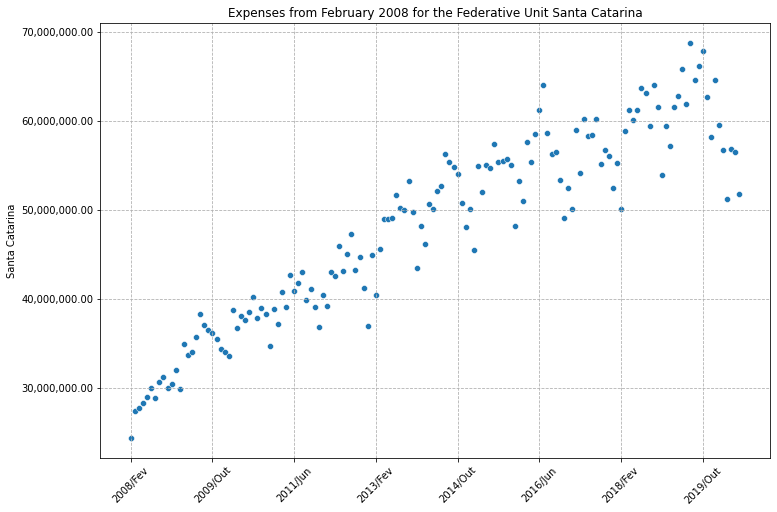

In [64]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=monthly, x=monthly.index, y='Santa Catarina')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.xticks(rotation=45)
plt.grid(linestyle='--')
plt.title('Expenses from February 2008 for the Federative Unit Santa Catarina');

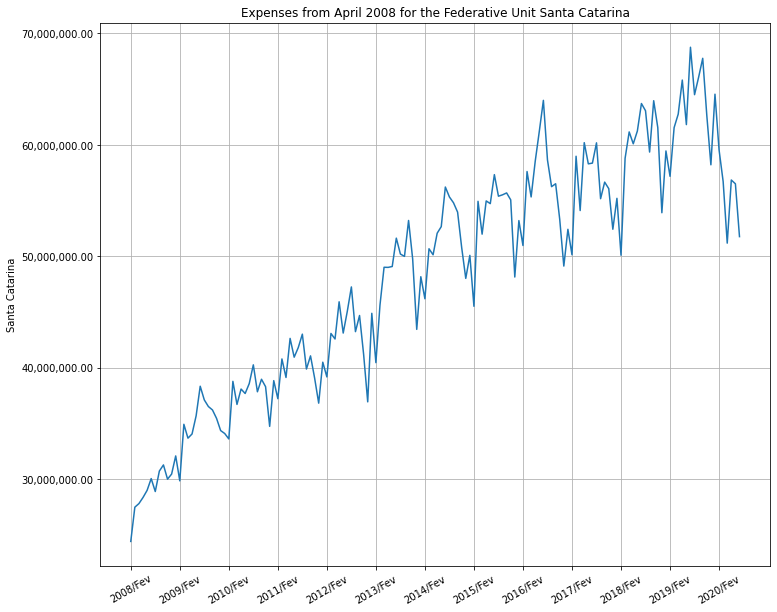

In [65]:
plt.figure(figsize=(12,10))
ax = sns.lineplot(data=monthly, x=monthly.index, y='Santa Catarina')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.xticks(rotation=30)
plt.grid(True)
plt.title('Expenses from April 2008 for the Federative Unit Santa Catarina');

Plot using lineplot, same happend here is impossible to visualize the axis=X

### Class 4 - Working with Datetime and melt

Create a function to transform the date format

In [66]:
from datetime import date

months = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6, 
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12
}

def per_day(year_month: str):
    year: int = int(year_month[:4])
    month: str = year_month[5:]
    month_number: int= months[month]
    return date(year, month_number, 1)
 

monthly.index = monthly.index.map(per_day)
monthly.head()

Unidade da Federação     São Paulo  Minas Gerais       Paraná  \
2008-02-01            1.728349e+08   70301089.50  48855046.46   
2008-03-01            1.704818e+08   79119005.51  55611791.07   
2008-04-01            1.702783e+08   79046322.41  56115135.82   
2008-05-01            1.724022e+08   79268070.12  55574831.93   
2008-06-01            1.754166e+08   79608652.53  56094754.74   

Unidade da Federação  Rio Grande do Sul  Rio de Janeiro        Bahia  \
2008-02-01                  45897704.82     44122593.19  33410124.06   
2008-03-01                  52928695.92     42892665.52  41301703.40   
2008-04-01                  51972416.77     45295962.86  42826993.62   
2008-05-01                  51679350.79     43951349.46  42071294.17   
2008-06-01                  53759674.01     44102925.77  39910042.40   

Unidade da Federação   Pernambuco  Santa Catarina        Ceará        Goiás  \
2008-02-01            26222079.10     24409572.92  27643304.86  18149374.27   
2008-03-01            30716361.81     27483480.50  30085370.22  20992213.03   
2008-04-01            30589332.79     27806641.44  31376221.00  21049477.30   
2008-05-01            31409553.23     28354279.52  31189904.62  19162546.79   
2008-06-01            28947510.92     28993292.76  29463965.11  20332533.92   

Unidade da Federação  ...        Piauí      Alagoas  Mato Grosso    Amazonas  \
2008-02-01            ...   9711680.20   8112220.30   7929894.93  7934652.10   
2008-03-01            ...  10428191.09   9210505.56   9416367.68  8641517.13   
2008-04-01            ...  10227943.00  10466691.94   9390588.03  8531576.49   
2008-05-01            ...  10562148.66   9844096.03   9378197.25  9079902.15   
2008-06-01            ...  10465088.93  10288668.11   9450300.60  8646295.77   

Unidade da Federação     Sergipe   Tocantins    Rondônia        Acre  \
2008-02-01            4636850.76  5051932.07  1940792.63  1743978.66   
2008-03-01            5017838.07  5200151.87  1955721.68  2057439.02   
2008-04-01            5265951.03  5343714.73  2143353.81  2057829.69   
2008-05-01            5367094.94  5344487.99  2280382.58  2226577.93   
2008-06-01            4981036.36  5398413.09  2624542.97  2112576.82   

Unidade da Federação     Roraima       Amapá  
2008-02-01             771687.83  1275063.72  
2008-03-01             876091.18  1177745.93  
2008-04-01             896952.53  1396371.51  
2008-05-01            1027288.73  1411520.77  
2008-06-01             938293.54  1420892.01  

[5 rows x 27 columns]

Plot the previous graphic without using the locator, because now the index is a date (object) and the library pandas understand the situation and plot it correct.

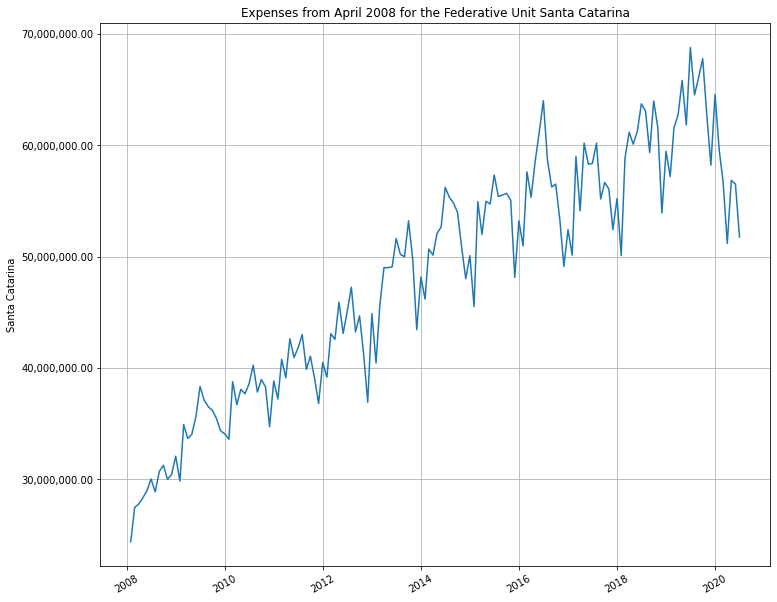

In [67]:
plt.figure(figsize=(12,10))
ax = sns.lineplot(data=monthly, x=monthly.index, y='Santa Catarina')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(True)
plt.title('Expenses from April 2008 for the Federative Unit Santa Catarina');

### Manipulation of data

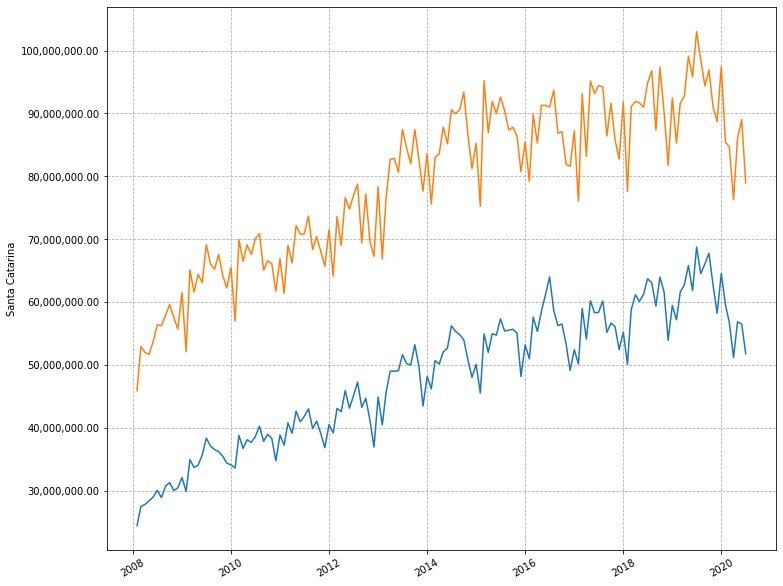

In [68]:
plt.figure(figsize=(12,10))
ax = sns.lineplot(data=monthly, x=monthly.index, y='Santa Catarina')
ax = sns.lineplot(data=monthly, x=monthly.index, y='Rio Grande do Sul')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(linestyle='--')

In [69]:
monthly_dist =  monthly.reset_index().melt(id_vars=['index'], value_vars=monthly.columns)
monthly_dist.columns = ['day_month_year', 'UF', 'Expenses']
monthly_dist['day_month_year'] = monthly_dist['day_month_year'].astype('datetime64')
monthly_dist.head()

day_month_year         UF      Expenses
0     2008-02-01  São Paulo  1.728349e+08
1     2008-03-01  São Paulo  1.704818e+08
2     2008-04-01  São Paulo  1.702783e+08
3     2008-05-01  São Paulo  1.724022e+08
4     2008-06-01  São Paulo  1.754166e+08

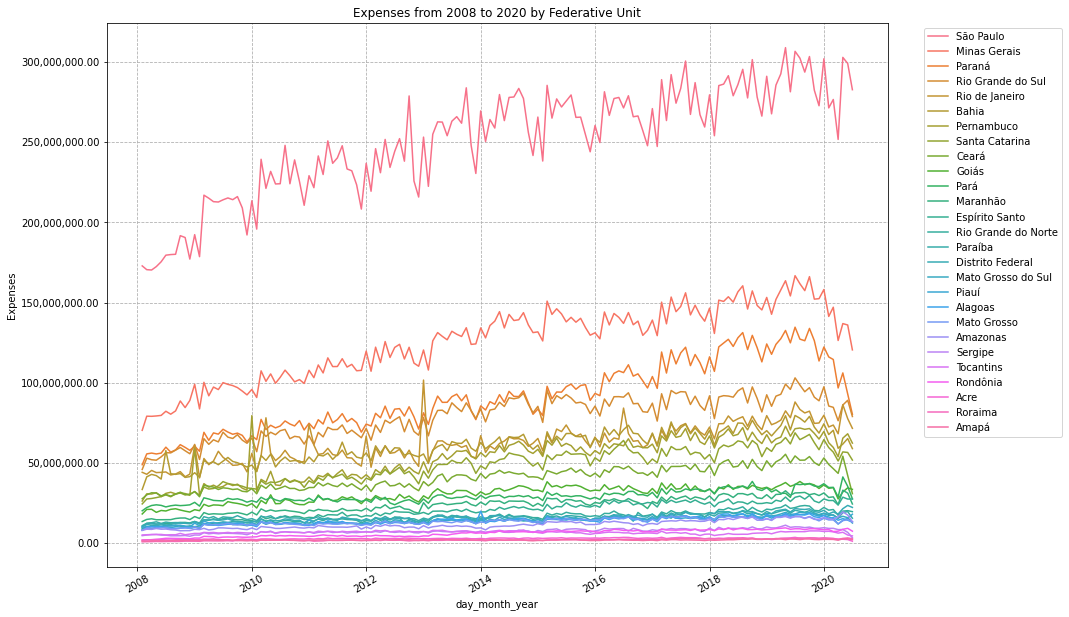

In [70]:
plt.figure(figsize=(14,10))
ax = sns.lineplot(data=monthly_dist, x='day_month_year', y='Expenses', hue= 'UF')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Expenses from 2008 to 2020 by Federative Unit');

In [71]:
monthly_dist.query("UF=='Santa Catarina'")
monthly_dist.query("UF=='Minas Gerais'")

day_month_year            UF      Expenses
150     2008-02-01  Minas Gerais  7.030109e+07
151     2008-03-01  Minas Gerais  7.911901e+07
152     2008-04-01  Minas Gerais  7.904632e+07
153     2008-05-01  Minas Gerais  7.926807e+07
154     2008-06-01  Minas Gerais  7.960865e+07
..             ...           ...           ...
295     2020-03-01  Minas Gerais  1.470786e+08
296     2020-04-01  Minas Gerais  1.263306e+08
297     2020-05-01  Minas Gerais  1.368673e+08
298     2020-06-01  Minas Gerais  1.359776e+08
299     2020-07-01  Minas Gerais  1.204672e+08

[150 rows x 3 columns]

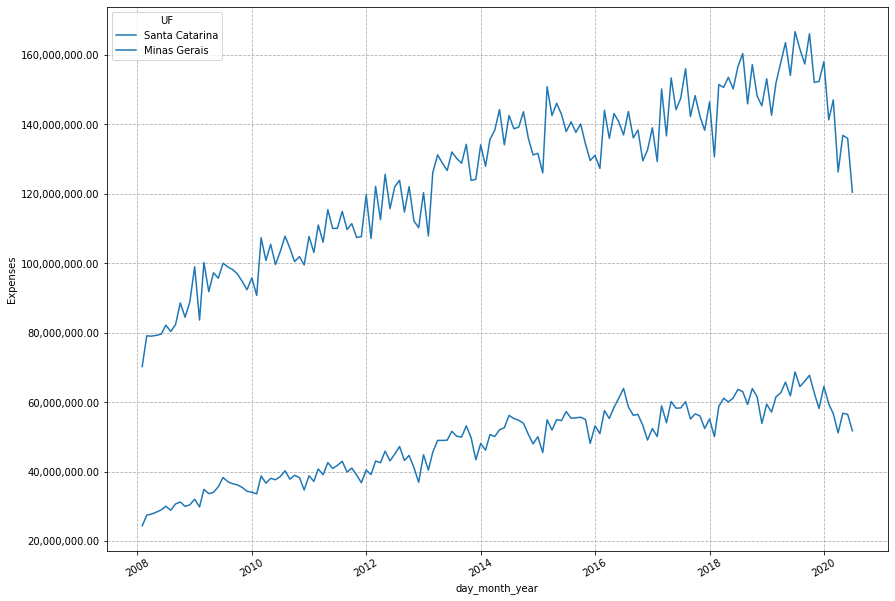

In [72]:
plt.figure(figsize=(14,10))
ax = sns.lineplot(data=monthly_dist.query("UF=='Santa Catarina'"), x='day_month_year', y='Expenses', hue= 'UF')
ax = sns.lineplot(data=monthly_dist.query("UF=='Minas Gerais'"), x='day_month_year', y='Expenses', hue= 'UF')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(linestyle='--')

### Create a new column by region

In [73]:
monthly_dist['region'] = monthly_dist['UF']

monthly_dist["region"].replace(["Amazonas","Roraima","Amapá","Pará","Tocantins","Rondônia","Acre"], "Norte", inplace=True)
monthly_dist["region"].replace(["Maranhão","Piauí","Ceará","Rio Grande do Norte","Pernambuco","Paraíba","Sergipe","Alagoas","Bahia"], "Nordeste", inplace=True)
monthly_dist["region"].replace(["Mato Grosso","Mato Grosso do Sul","Goiás","Distrito Federal"], "Centro-Oeste", inplace=True)
monthly_dist["region"].replace(["Paraná","Rio Grande do Sul","Santa Catarina"], "Sul", inplace=True)
monthly_dist["region"].replace(["São Paulo","Rio de Janeiro","Espírito Santo","Minas Gerais"], "Sudeste", inplace=True)
#Show the states
monthly_dist.UF.unique()

array(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo',
       'Rio Grande do Norte', 'Paraíba', 'Distrito Federal',
       'Mato Grosso do Sul', 'Piauí', 'Alagoas', 'Mato Grosso',
       'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre', 'Roraima',
       'Amapá'], dtype=object)

In [74]:
monthly_dist.tail(3)

day_month_year     UF    Expenses region
4047     2020-05-01  Amapá  2701014.87  Norte
4048     2020-06-01  Amapá  2699492.23  Norte
4049     2020-07-01  Amapá  2155083.37  Norte

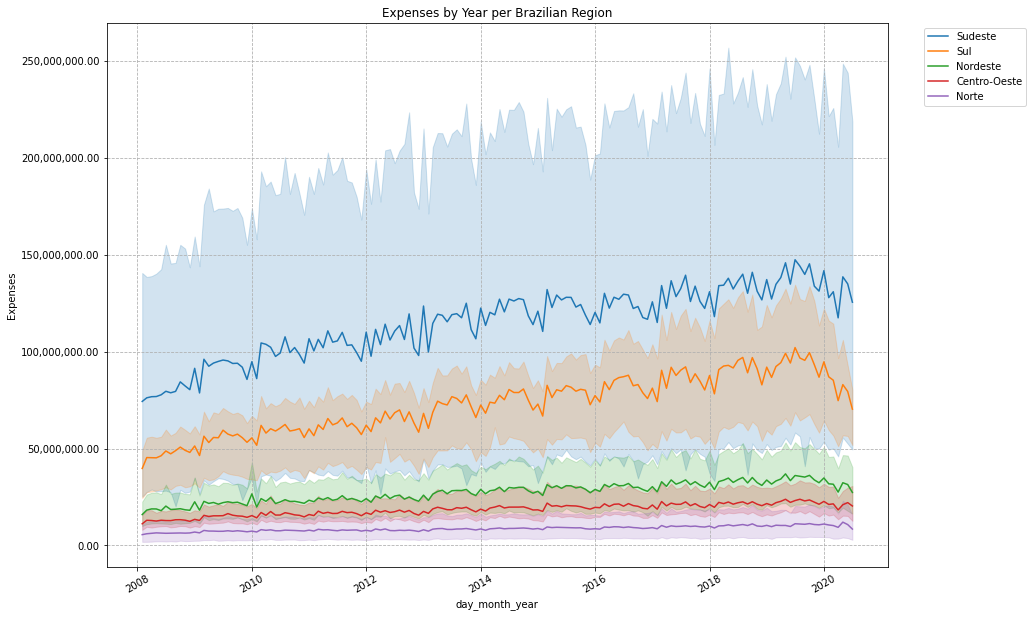

In [75]:
plt.figure(figsize=(14,10))
ax = sns.lineplot(data=monthly_dist, x='day_month_year', y='Expenses', hue= 'region',ci=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Expenses by Year per Brazilian Region');

## Class 5 - Data manipulation and creating analysis

In [76]:
monthly_dist['month'] = monthly_dist['day_month_year'].dt.month
monthly_dist['year'] = monthly_dist['day_month_year'].dt.year
monthly_dist.head()

day_month_year         UF      Expenses   region  month  year
0     2008-02-01  São Paulo  1.728349e+08  Sudeste      2  2008
1     2008-03-01  São Paulo  1.704818e+08  Sudeste      3  2008
2     2008-04-01  São Paulo  1.702783e+08  Sudeste      4  2008
3     2008-05-01  São Paulo  1.724022e+08  Sudeste      5  2008
4     2008-06-01  São Paulo  1.754166e+08  Sudeste      6  2008

In [77]:
monthly_dist.query("UF=='Santa Catarina'")

day_month_year              UF     Expenses region  month  year
1050     2008-02-01  Santa Catarina  24409572.92    Sul      2  2008
1051     2008-03-01  Santa Catarina  27483480.50    Sul      3  2008
1052     2008-04-01  Santa Catarina  27806641.44    Sul      4  2008
1053     2008-05-01  Santa Catarina  28354279.52    Sul      5  2008
1054     2008-06-01  Santa Catarina  28993292.76    Sul      6  2008
...             ...             ...          ...    ...    ...   ...
1195     2020-03-01  Santa Catarina  56709962.09    Sul      3  2020
1196     2020-04-01  Santa Catarina  51179993.45    Sul      4  2020
1197     2020-05-01  Santa Catarina  56843604.33    Sul      5  2020
1198     2020-06-01  Santa Catarina  56503747.99    Sul      6  2020
1199     2020-07-01  Santa Catarina  51764534.76    Sul      7  2020

[150 rows x 6 columns]

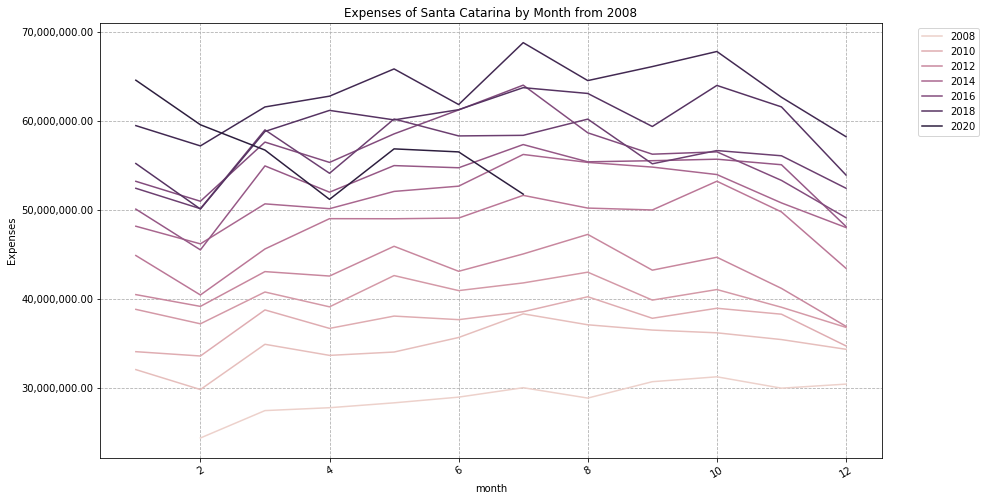

In [78]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(data=monthly_dist.query("UF=='Santa Catarina'"), x='month', y='Expenses', hue= 'year')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Expenses of Santa Catarina by Month from 2008');

 ### Challenges
 
Update palete of colors, add title, ticks of months instead of numbers, use a diferent state to plot.

Create a dictionary to manipulate the months and divide by days, to get a more accurated results.

In [79]:
days_per_month = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}

In [80]:
monthly_dist ['Expenses_daily'] = monthly_dist ['Expenses'] / monthly_dist['month'].map(days_per_month)
monthly_dist ['Expenses_daily'].head()

0    6.172676e+06
1    5.499415e+06
2    5.675943e+06
3    5.561361e+06
4    5.847220e+06
Name: Expenses_daily, dtype: float64

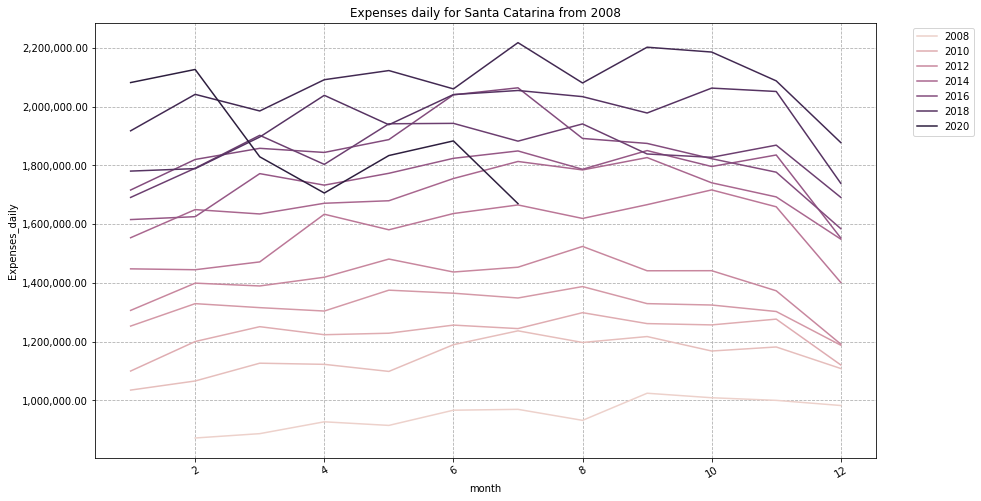

In [81]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(data=monthly_dist.query("UF=='Santa Catarina'"), x='month', y='Expenses_daily', hue= 'year')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Expenses daily for Santa Catarina from 2008');

In [82]:
analyse_state = monthly_dist.query("UF=='Santa Catarina'")
analyse_state.head()

day_month_year              UF     Expenses region  month  year  \
1050     2008-02-01  Santa Catarina  24409572.92    Sul      2  2008   
1051     2008-03-01  Santa Catarina  27483480.50    Sul      3  2008   
1052     2008-04-01  Santa Catarina  27806641.44    Sul      4  2008   
1053     2008-05-01  Santa Catarina  28354279.52    Sul      5  2008   
1054     2008-06-01  Santa Catarina  28993292.76    Sul      6  2008   

      Expenses_daily  
1050   871770.461429  
1051   886563.887097  
1052   926888.048000  
1053   914654.178065  
1054   966443.092000

In [83]:
expenses_per_year = analyse_state.groupby('year').sum()
expenses_per_year.head()

Expenses  month  Expenses_daily
year                                     
2008  3.184379e+08     77    1.048293e+07
2009  4.182490e+08     78    1.374703e+07
2010  4.476234e+08     78    1.471748e+07
2011  4.811989e+08     78    1.582218e+07
2012  5.127005e+08     78    1.685704e+07

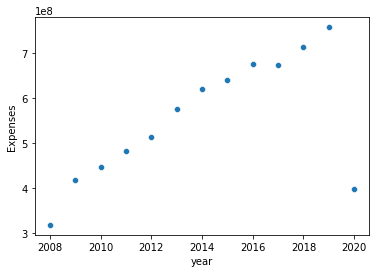

In [84]:
sns.scatterplot(data=expenses_per_year, x= expenses_per_year.index, y='Expenses');

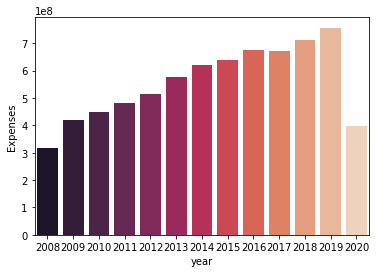

In [85]:
sns.barplot(data=expenses_per_year, x= expenses_per_year.index, y='Expenses', palette=sns.color_palette('rocket', 13));

Group by specific states, including all years, in the end reset index to have a normal table back

In [86]:
states = ['Santa Catarina', 'Minas Gerais', 'Distrito Federal']
per_year_states = monthly_dist.query('UF in @states').groupby(['UF', 'year']).sum().reset_index()
per_year_states.head()

UF  year      Expenses  month  Expenses_daily
0  Distrito Federal  2008  1.296348e+08     77    4.269352e+06
1  Distrito Federal  2009  1.660273e+08     78    5.458527e+06
2  Distrito Federal  2010  1.680668e+08     78    5.528014e+06
3  Distrito Federal  2011  1.767454e+08     78    5.812057e+06
4  Distrito Federal  2012  1.794531e+08     78    5.901158e+06

### Ploting the 3 different options of graphic with the same data

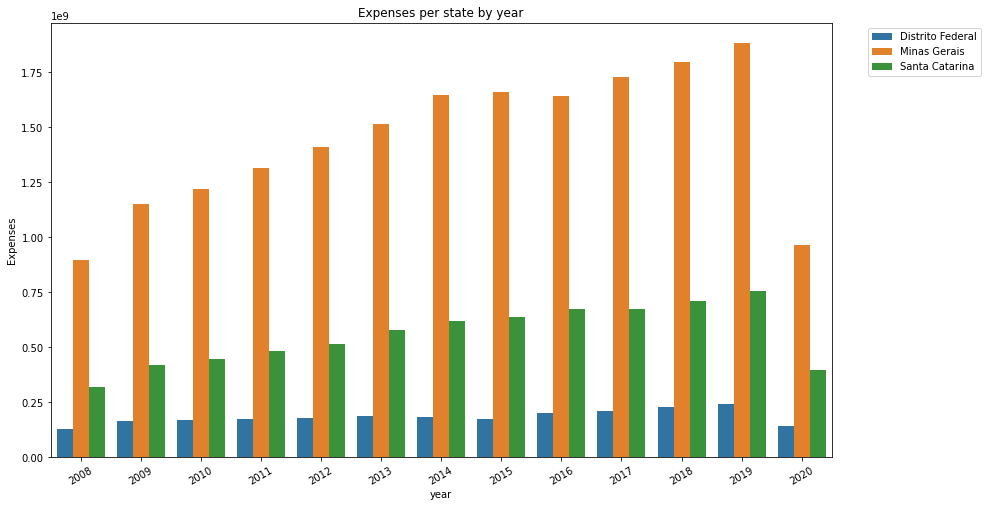

In [87]:
plt.figure(figsize=(14,8))
sns.barplot(data=per_year_states, x='year', y='Expenses', hue='UF')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.title('Expenses per state by year');

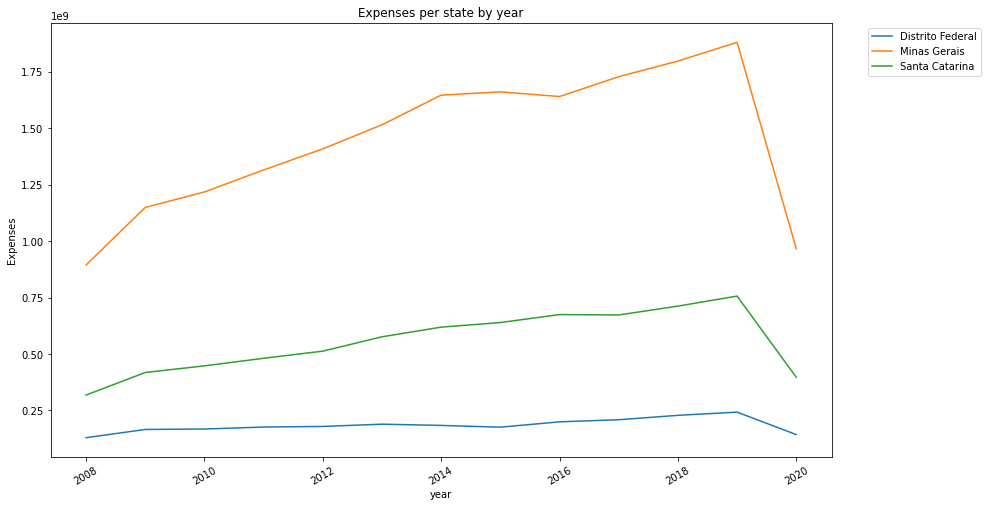

In [88]:
plt.figure(figsize=(14,8))
sns.lineplot(data=per_year_states, x='year', y='Expenses', hue='UF')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.title('Expenses per state by year');

<Figure size 1008x576 with 0 Axes>

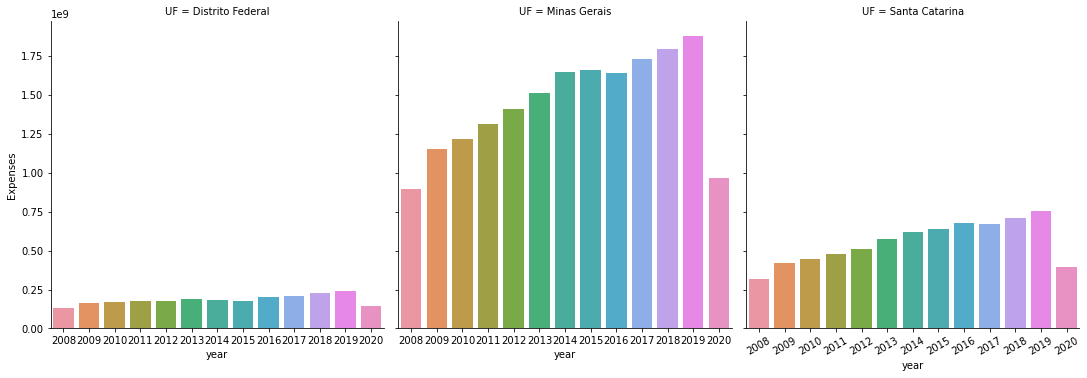

In [89]:
plt.figure(figsize=(14,8))
sns.catplot(data=per_year_states, y='Expenses', x='year', kind='bar', col='UF')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30);

### Visualize data using Plotly

In [90]:
high_exp.head()

2008/Fev      2008/Mar      2008/Abr      2008/Mai  \
Unidade da Federação                                                           
São Paulo             1.728349e+08  1.704818e+08  1.702783e+08  1.724022e+08   
Minas Gerais          7.030109e+07  7.911901e+07  7.904632e+07  7.926807e+07   
Paraná                4.885505e+07  5.561179e+07  5.611514e+07  5.557483e+07   
Rio Grande do Sul     4.589770e+07  5.292870e+07  5.197242e+07  5.167935e+07   
Rio de Janeiro        4.412259e+07  4.289267e+07  4.529596e+07  4.395135e+07   

                          2008/Jun      2008/Jul      2008/Ago      2008/Set  \
Unidade da Federação                                                           
São Paulo             1.754166e+08  1.795250e+08  1.798981e+08  1.800822e+08   
Minas Gerais          7.960865e+07  8.220022e+07  8.037412e+07  8.240015e+07   
Paraná                5.609475e+07  5.980240e+07  5.669900e+07  5.809199e+07   
Rio Grande do Sul     5.375967e+07  5.639165e+07  5.623376e+07  5.791017e+07   
Rio de Janeiro        4.410293e+07  4.434852e+07  4.248794e+07  4.306646e+07   

                          2008/Out      2008/Nov  ...      2019/Out  \
Unidade da Federação                              ...                 
São Paulo             1.916852e+08  1.905397e+08  ...  3.033825e+08   
Minas Gerais          8.861348e+07  8.448700e+07  ...  1.661338e+08   
Paraná                6.136594e+07  5.966721e+07  ...  1.338480e+08   
Rio Grande do Sul     5.959212e+07  5.756574e+07  ...  9.691390e+07   
Rio de Janeiro        4.455331e+07  4.135151e+07  ...  8.224773e+07   

                          2019/Nov      2019/Dez      2020/Jan      2020/Fev  \
Unidade da Federação                                                           
São Paulo             2.823918e+08  2.726977e+08  3.019912e+08  2.713568e+08   
Minas Gerais          1.521067e+08  1.523986e+08  1.580979e+08  1.413232e+08   
Paraná                1.262094e+08  1.135453e+08  1.222688e+08  1.160616e+08   
Rio Grande do Sul     9.097181e+07  8.872087e+07  9.747436e+07  8.545165e+07   
Rio de Janeiro        7.462048e+07  7.489586e+07  7.970566e+07  7.241281e+07   

                          2020/Mar      2020/Abr      2020/Mai      2020/Jun  \
Unidade da Federação                                                           
São Paulo             2.766063e+08  2.516964e+08  3.028577e+08  2.990609e+08   
Minas Gerais          1.470786e+08  1.263306e+08  1.368673e+08  1.359776e+08   
Paraná                1.144770e+08  9.672711e+07  1.061037e+08  9.290146e+07   
Rio Grande do Sul     8.465140e+07  7.629460e+07  8.607611e+07  8.901948e+07   
Rio de Janeiro        7.359450e+07  6.816077e+07  8.628103e+07  7.760493e+07   

                          2020/Jul  
Unidade da Federação                
São Paulo             2.827096e+08  
Minas Gerais          1.204672e+08  
Paraná                8.032085e+07  
Rio Grande do Sul     7.892970e+07  
Rio de Janeiro        7.154023e+07  

[5 rows x 150 columns]

In [91]:
import plotly.graph_objects as go

In [92]:
fig = go.Figure()

In [93]:
fig.add_trace(go.Scatter(x= high_exp.T.index, y=high_exp.T['Minas Gerais'], name='Minas Gerais'))
fig.add_trace(go.Scatter(x= high_exp.T.index, y=high_exp.T['Santa Catarina'], name='Santa Catarina'))